Generate a TensorFlow model that predicts values in a sinewave. Based on the code by Pete Warden at https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/create_sine_model.ipynb

In [66]:
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [68]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.26.4
TensorFlow 2.17.0
Keras 3.4.1


In [69]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

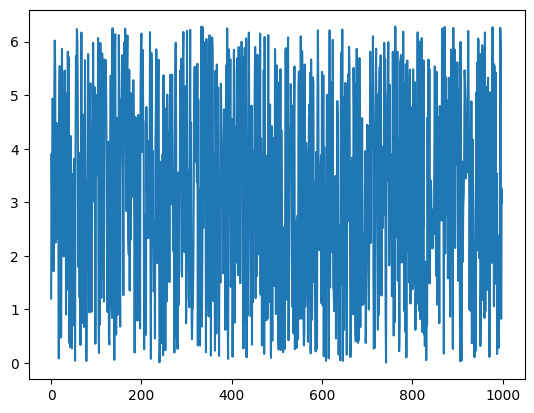

In [70]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

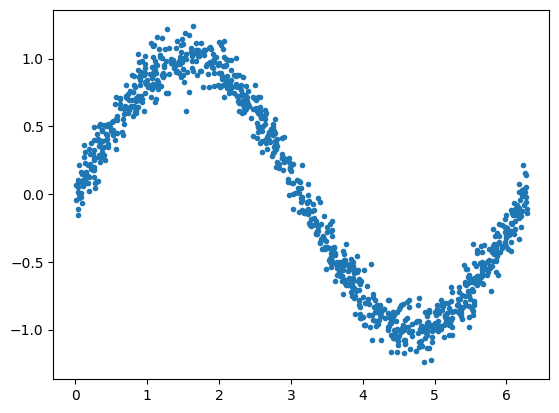

In [71]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

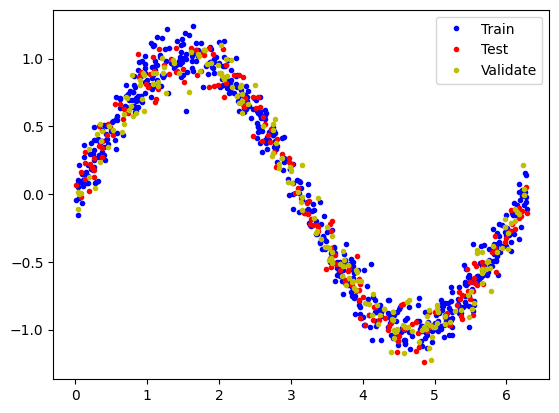

In [72]:
# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [73]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# View model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [76]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=600,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.8644 - mae: 0.8644 - val_loss: 0.7549 - val_mae: 0.7549
Epoch 2/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7200 - mae: 0.7200 - val_loss: 0.6374 - val_mae: 0.6374
Epoch 3/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6315 - mae: 0.6315 - val_loss: 0.5757 - val_mae: 0.5757
Epoch 4/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5827 - mae: 0.5827 - val_loss: 0.5410 - val_mae: 0.5410
Epoch 5/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5529 - mae: 0.5529 - val_loss: 0.5249 - val_mae: 0.5249
Epoch 6/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5449 - mae: 0.5449 - val_loss: 0.5105 - val_mae: 0.5105
Epoch 7/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5365 - mae: 0.5365 - val_loss: 0.5007 - val_mae: 0.5007
Epoch 8/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5221 - mae: 0.5221 - val_loss: 0.4930 - val_mae: 0.4930
Epoch 9/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5086 - mae: 0.50

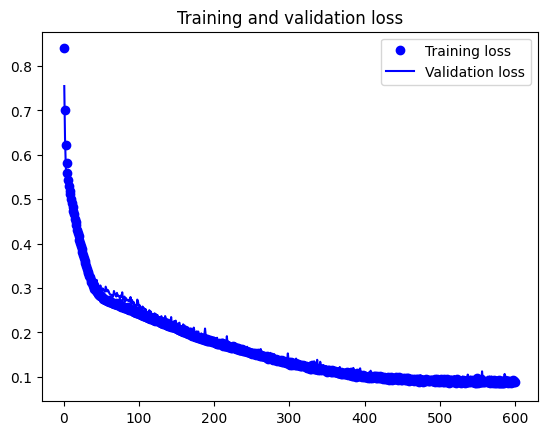

In [77]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


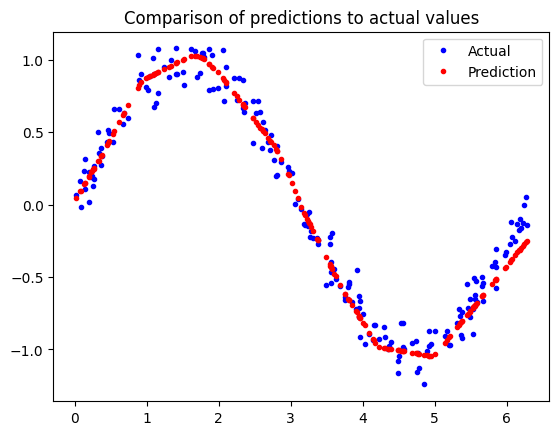

In [78]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [79]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmpv8gzzgzg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_28')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133298149238288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133298149122192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133298149028464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133298149024592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133298149023360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133298168613872: TensorSpec(shape=(), dtype=tf.resource, name=None)


3168

In [80]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [81]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


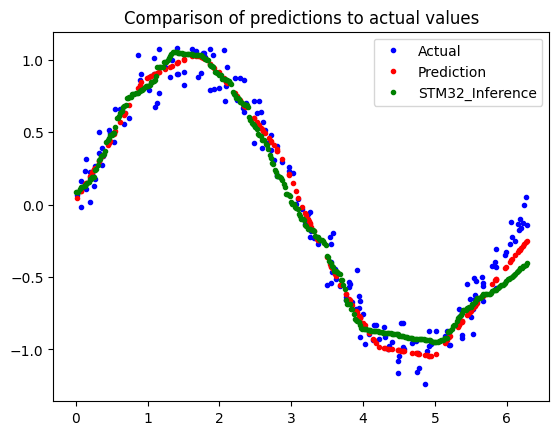

In [82]:
# Repalce the data here with your actual inference data on the STM32 Edge Device
inference_result = [
    0.084677, 0.086197, 0.087210, 0.108004, 0.123855, 0.125054, 0.125653, 0.129247,
    0.146022, 0.146621, 0.155439, 0.173864, 0.176811, 0.191518, 0.192391, 0.240422,
    0.245734, 0.272596, 0.309606, 0.316510, 0.339194, 0.341166, 0.350043, 0.373713,
    0.432889, 0.444724, 0.457546, 0.481216, 0.482203, 0.496010, 0.496997, 0.535461,
    0.600555, 0.601541, 0.609431, 0.630876, 0.646792, 0.675275, 0.684490, 0.692030,
    0.738425, 0.739448, 0.740472, 0.745080, 0.762998, 0.763510, 0.765558, 0.771190,
    0.772726, 0.773749, 0.784500, 0.789108, 0.795251, 0.800883, 0.813682, 0.818802,
    0.821361, 0.822897, 0.823921, 0.845423, 0.845935, 0.856175, 0.859759, 0.887918,
    0.948333, 0.948845, 0.949357, 0.949869, 0.950893, 0.982636, 0.984684, 0.986220,
    1.001579, 1.015915, 1.029226, 1.037930, 1.055681, 1.054953, 1.053822, 1.051397,
    1.050912, 1.049134, 1.046871, 1.045174, 1.043719, 1.043557, 1.043153, 1.041698,
    1.040971, 1.040809, 1.040567, 1.037899, 1.036202, 1.036121, 1.035960, 1.035717,
    1.034182, 1.033293, 1.033050, 1.025115, 1.019926, 1.009548, 1.007190, 1.002472,
    0.996812, 0.962376, 0.958130, 0.957658, 0.949167, 0.914731, 0.913316, 0.911901,
    0.898223, 0.896336, 0.895393, 0.869922, 0.868979, 0.868036, 0.864734, 0.860489,
    0.857187, 0.842094, 0.835490, 0.780305, 0.761910, 0.760966, 0.734553, 0.733610,
    0.727478, 0.707667, 0.706253, 0.696347, 0.694932, 0.690216, 0.686442, 0.673821,
    0.604612, 0.584837, 0.562097, 0.560120, 0.550232, 0.533424, 0.521560, 0.487944,
    0.479045, 0.476079, 0.447407, 0.446418, 0.444440, 0.421700, 0.410824, 0.382152,
    0.342603, 0.323818, 0.287236, 0.283281, 0.242744, 0.225936, 0.197263, 0.195286,
    0.190342, 0.187376, 0.167601, 0.143873, 0.124098, 0.072686, 0.071697, 0.068731,
    0.061810, 0.017318, 0.007431, 0.001498, -0.015310, -0.024208, -0.029152, -0.063757,
    -0.075621, -0.097373, -0.101328, -0.108248, -0.137910, -0.145820, -0.166582,
    -0.167571, -0.169548, -0.174492, -0.178447, -0.185368, -0.219973, -0.221950,
    -0.224916, -0.238758, -0.240736, -0.242713, -0.250622, -0.266442, -0.281273,
    -0.357403, -0.362347, -0.391020, -0.403873, -0.425624, -0.427602, -0.460229,
    -0.461218, -0.463196, -0.469128, -0.478026, -0.521529, -0.522518, -0.554157,
    -0.584807, -0.657971, -0.685655, -0.686644, -0.688622, -0.720260, -0.722238,
    -0.752887, -0.792436, -0.794413, -0.807267, -0.813199, -0.833962, -0.853736,
    -0.859876, -0.861132, -0.861360, -0.861817, -0.863644, -0.867754, -0.868781,
    -0.870836, -0.871864, -0.873006, -0.874376, -0.876088, -0.876317, -0.877687,
    -0.881797, -0.882253, -0.884194, -0.884309, -0.885222, -0.886478, -0.887620,
    -0.889104, -0.889675, -0.892643, -0.892985, -0.893671, -0.894356, -0.895840,
    -0.896182, -0.905202, -0.905430, -0.909084, -0.910226, -0.912281, -0.914564,
    -0.915249, -0.920044, -0.921643, -0.921985, -0.922442, -0.924954, -0.925296,
    -0.925639, -0.926095, -0.926666, -0.928150, -0.929064, -0.930548, -0.931461,
    -0.933631, -0.934088, -0.935914, -0.937627, -0.938426, -0.943221, -0.945847,
    -0.946532, -0.947446, -0.947674, -0.950300, -0.945045, -0.944721, -0.938239,
    -0.937267, -0.928192, -0.923979, -0.920414, -0.881638, -0.875962, -0.871704,
    -0.858932, -0.837644, -0.831967, -0.828419, -0.807132, -0.780167, -0.774491,
    -0.761009, -0.746818, -0.729787, -0.728368, -0.727659, -0.717015, -0.711338,
    -0.709210, -0.704242, -0.688631, -0.686503, -0.669473, -0.660957, -0.645346,
    -0.643928, -0.643218, -0.637541, -0.631865, -0.619801, -0.617673, -0.616963,
    -0.616254, -0.614834, -0.614125, -0.613415, -0.597805, -0.591418, -0.590709, -0.589999,
    -0.573679, -0.570840, -0.560197, -0.553101, -0.552391, -0.550972, -0.541747, -0.528265,
    -0.514074, -0.511236, -0.506978, -0.500592, -0.494205, -0.487110, -0.481433, -0.467950,
    -0.460145, -0.453759, -0.440986, -0.439567, -0.423957, -0.421828, -0.415441, -0.401250
]

# Plot predictions against actual values
predictions = model.predict(x_test)

x = np.linspace(0, max(x_test), len(inference_result))

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.plot(x, inference_result, 'g.', label='STM32_Inference')
plt.legend()
plt.show()